In [56]:
# [Celda 1] - Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# [Celda 2] - Carga de datos
# Leemos el dataset
df = pd.read_csv('youtoxic_english_1000.csv')

# Mostramos las primeras filas y la información del dataset
print("Primeras filas del dataset:")
display(df.head())
print("\nInformación del dataset:")
display(df.info())

Primeras filas del dataset:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


None

In [58]:
# [Celda 3] - Preparación y limpieza de datos

# Primero mostramos información sobre valores nulos en el dataset
print("Valores nulos por columna antes de la limpieza:")
print(df.isnull().sum())
print("\nTotal de filas antes de la limpieza:", len(df))

# Definimos las columnas que indican contenido dañino
toxic_columns = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 
                'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist',
                'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']


# Creamos una nueva columna que será True si cualquiera de las categorías es True
df['is_harmful'] = df[toxic_columns].any(axis=1)

# Preparamos X (textos) e y (etiquetas)
X = df['Text']
y = df['is_harmful']

# Mostramos estadísticas finales
print("\nEstadísticas finales:")
print("-" * 50)
print("Distribución de mensajes dañinos vs no dañinos:")
print(y.value_counts(normalize=True))
print("\nDistribución por tipo de contenido dañino:")
for col in toxic_columns:
    positivos = df[col].sum()
    porcentaje = (positivos / len(df)) * 100
    print(f"{col}: {positivos} casos ({porcentaje:.2f}%)")

Valores nulos por columna antes de la limpieza:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

Total de filas antes de la limpieza: 1000

Estadísticas finales:
--------------------------------------------------
Distribución de mensajes dañinos vs no dañinos:
is_harmful
False    0.538
True     0.462
Name: proportion, dtype: float64

Distribución por tipo de contenido dañino:
IsToxic: 462 casos (46.20%)
IsAbusive: 353 casos (35.30%)
IsThreat: 21 casos (2.10%)
IsProvocative: 161 casos (16.10%)
IsObscene: 100 casos (10.00%)
IsHatespeech: 138 casos (13.80%)
IsRacist: 125 casos (12.50%)
IsNationalist: 8 casos (0.80%)
IsSexist: 1 casos (0.10%)
IsHomophobic: 0 casos (0.00%)
IsReligiousHate: 12 casos (1.20%)
IsRadical

In [59]:
# [Celda 4] - División de datos
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantenemos la proporción de clases
)

print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 800
Tamaño del conjunto de prueba: 200


In [60]:
# [Celda 5] - Vectorización del texto
# Convertimos el texto a una matriz de características TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,  # Limitamos el número de características
    min_df=2,          # Ignoramos términos que aparecen en menos de 2 documentos
    stop_words='english'  # Removemos stopwords en inglés
)

# Transformamos los textos
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Dimensiones de la matriz de características de entrenamiento:", X_train_vectorized.shape)

Dimensiones de la matriz de características de entrenamiento: (800, 1496)


In [61]:
# [Celda 6] - Entrenamiento del modelo SVM
# Creamos y entrenamos el modelo
svm_model = SVC(
    kernel='linear',     # Kernel lineal para mejor interpretabilidad
    probability=True,    # Habilitamos probabilidades
    random_state=42,     # Para reproducibilidad
    class_weight='balanced'  # Maneja el desbalanceo de clases
)

# Entrenamos el modelo
svm_model.fit(X_train_vectorized, y_train)

print("Modelo entrenado correctamente!")

Modelo entrenado correctamente!


Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.70      0.78      0.74       108
        True       0.70      0.61      0.65        92

    accuracy                           0.70       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200



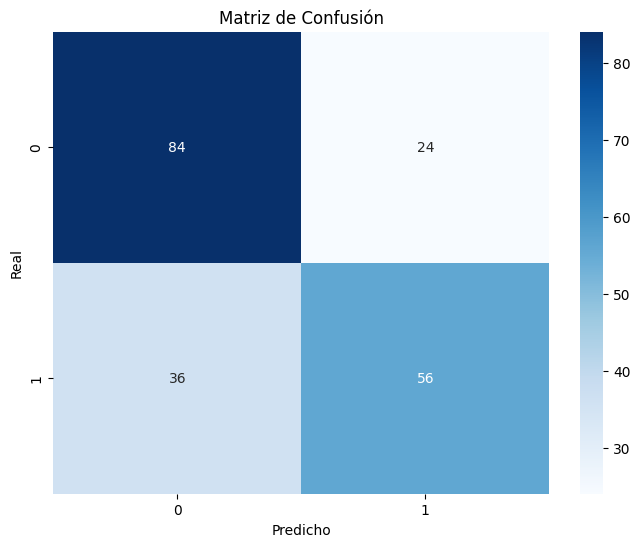

In [62]:
# [Celda 7] - Evaluación del modelo
# Realizamos predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_vectorized)

# Mostramos el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

In [63]:
# [Celda 8 corregida] - Función para detectar nuevos mensajes
def detect_hate_speech(text):
    """
    Analiza un nuevo texto para detectar si contiene mensaje de odio
    """
    # Vectorizamos el texto
    text_vectorized = vectorizer.transform([text])
    
    # Obtenemos la predicción y la probabilidad
    # No necesitamos envolver text_vectorized en otra lista
    is_harmful = svm_model.predict(text_vectorized)[0]
    prob_harmful = svm_model.predict_proba(text_vectorized)[0][1]
    
    return {
        'texto': text,
        'es_dañino': bool(is_harmful),
        'probabilidad': float(prob_harmful)
    }

In [64]:
# [Celda 9 corregida] - Ejemplo de uso
# Probamos el modelo con algunos ejemplos
textos_prueba = [
    "This is a stupid message about kills",
    "I love spending time with my family"
]

for texto in textos_prueba:
    resultado = detect_hate_speech(texto)
    print(f"\nTexto: {resultado['texto']}")
    print(f"Es dañino: {resultado['es_dañino']}")
    print(f"Probabilidad: {resultado['probabilidad']:.2f}")


Texto: This is a stupid message about kills
Es dañino: True
Probabilidad: 0.80

Texto: I love spending time with my family
Es dañino: False
Probabilidad: 0.15
